In [1]:
# Main steps of machine learning project
# 1. look at the big picture
# 2. Get the data
# 3. Discover and visualize the data to gain insights
# 4. Preprae the data for Machine Learning algorithms
# 5. Select a model and train it
# 6. Fine-tune your model
# 7. Present your solution
# 8. Launch, monitor, and maintain your system

In [2]:
# Frame the problem: what exactly
# is the business objective
# what am I trying to solve?
# This is important because it tells you
# the algorithms you will select,
# performance measure

1. Recall the objective function for linear regression can be expressed
as 

\begin{eqnarray*}
E(w) & = & \frac{1}{N}\begin{Vmatrix}Xw-y\end{Vmatrix}^{2}\\
\end{eqnarray*}


Minimizing this function with respect to $w$ leads to the optimal
$w$ as $(X^{T}X)^{-1}X^{T}y$ this solution holds only when $X^{T}X$
is nonsingular. To overcome this problem, the following objective
function is commonly minimized instead:

\begin{eqnarray*}
E_{2}(w) & = & \begin{Vmatrix}Xw-y\end{Vmatrix}^{2}+\lambda\begin{Vmatrix}w\end{Vmatrix}^{2}\\
\end{eqnarray*}


where $\lambda>0$ is a user-specified parameter. Please do the following:

\begin{eqnarray*}
\nabla_{w}E_{2}(w) & =\\
 & = & X^{T}(Xw-y)+\lambda w=0\\
 & = & X^{T}Xw-X^{T}y+\lambda w=0\\
 & = & X^{T}Xw+\lambda w=X^{T}y\\
 & = & (X^{T}X+I\lambda)w=X^{T}y\\
 & = & (X^{T}X+I\lambda)^{-1}X^{T}y
\end{eqnarray*}


A symmetric matrix plus a symmetric matrix is still symmetrix thus
we look at the quadratic form of $(X^{T}X+I\lambda)$

\begin{eqnarray*}
f(x) & = & v^{T}(X^{T}X+I\lambda)v\\
 & = & v^{T}X^{T}Xv+v^{T}\lambda v\\
 & = & (Xv)^{T}Xv+\lambda v^{T}v\\
 & = & \begin{Vmatrix}Xv\end{Vmatrix}^{2}+\lambda\begin{Vmatrix}v\end{Vmatrix}^{2}\\
\end{eqnarray*}


Suppose $X$ is singular and $v$ is a non-zero s.t that $Xv=0$ then

\begin{eqnarray*}
\begin{Vmatrix}Xv\end{Vmatrix}^{2}+\lambda\begin{Vmatrix}v\end{Vmatrix}^{2} & =\\
 & = & 0+\lambda\begin{Vmatrix}v\end{Vmatrix}^{2}\\
 & = & \lambda\begin{Vmatrix}v\end{Vmatrix}^{2}>0\,Since\,\lambda\,is\,positive
\end{eqnarray*}


We conclude $X^{T}X+I\lambda$ is positive definite and thus is non-singular.


In [3]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
import numpy as np

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


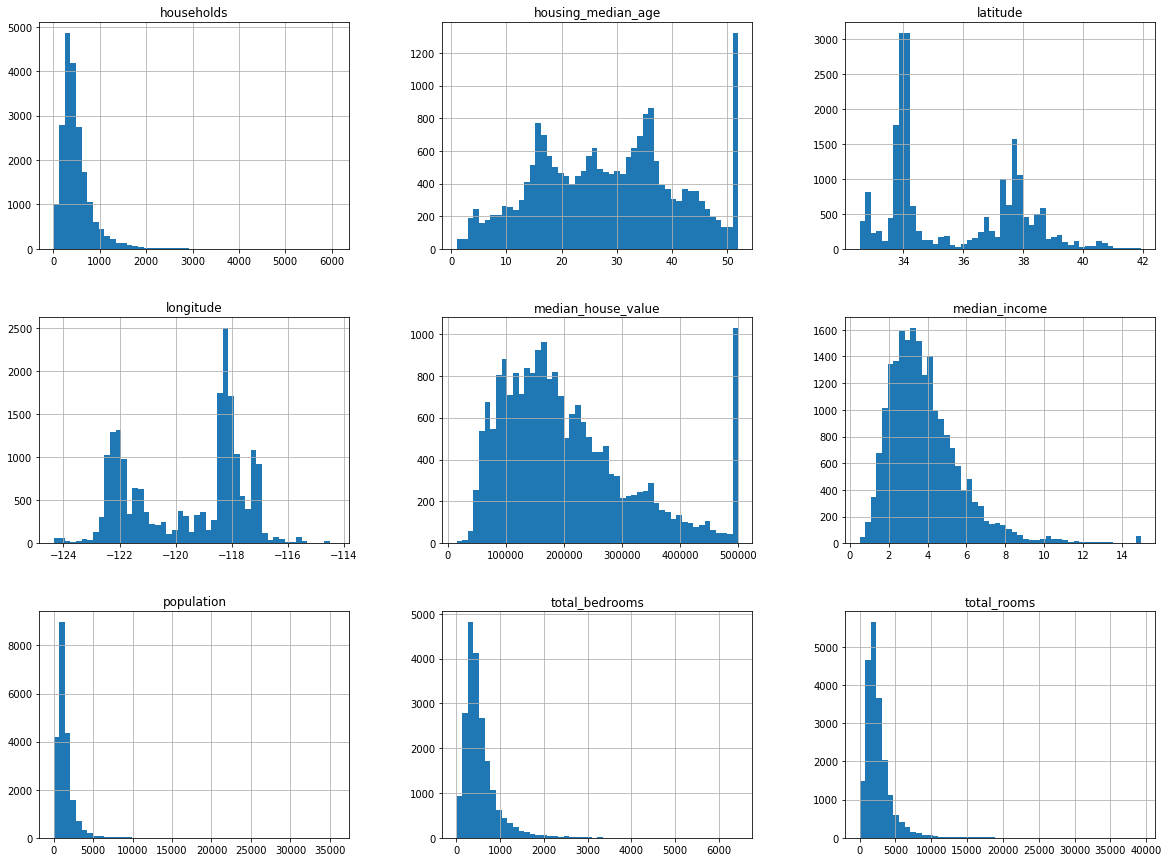

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

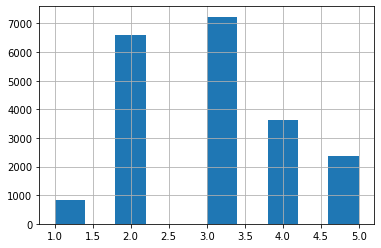

In [11]:
housing['income_cat'].hist()
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
 strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

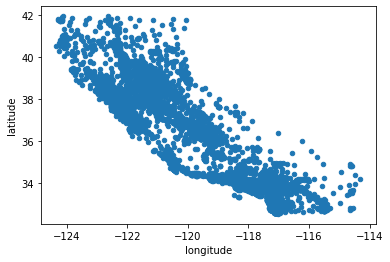

In [16]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')
plt.show()

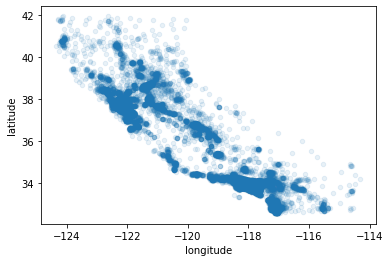

In [17]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
plt.show()

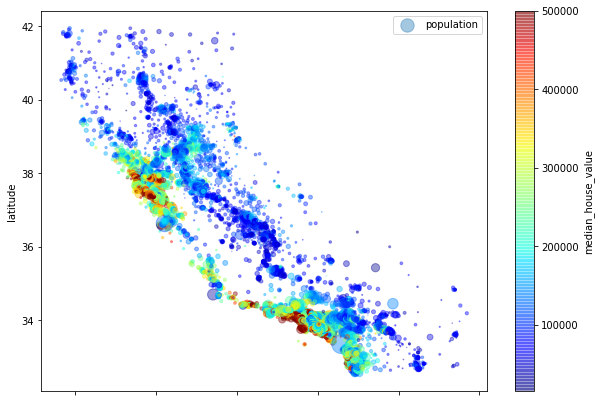

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

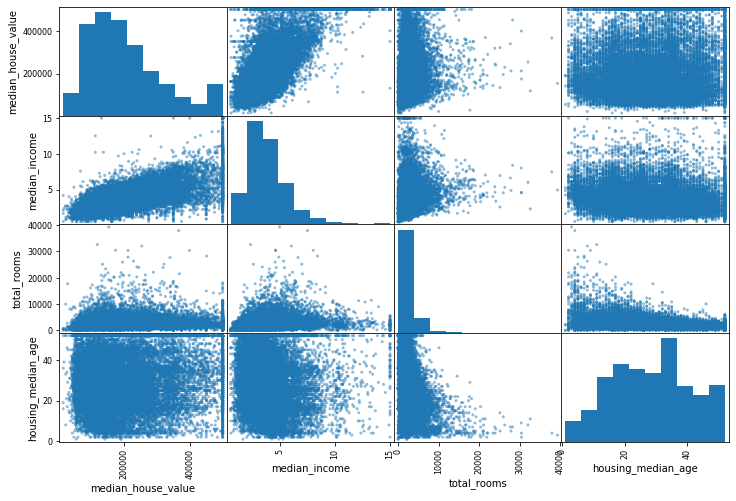

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

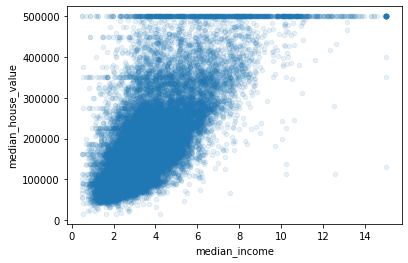

In [22]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.show()

In [14]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [15]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [16]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [17]:
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [18]:
from sklearn.impute import SimpleImputer

imputer  = SimpleImputer(strategy = 'median')

In [19]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [20]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [21]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [22]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [23]:
X = imputer.transform(housing_num)

In [24]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [25]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [26]:
# machine learnigng algorithms prefre to work with numbers thus we convert from textual to numerical
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [27]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [28]:
np.unique(housing_cat_encoded)

array([0., 1., 2., 3., 4.])

In [29]:
np.unique(ordinal_encoder.categories_)

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [30]:
# ordinal encoding doesn't make sense for our problem because there is no ranking associated with the data
# we use one-hot- encoding instead

In [31]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
# sparse matrix representation is more effecient than storeing mostly zeros as a 2d-array

In [42]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [43]:
housing_cat_1hot.toarray().shape

(16512, 5)

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [34]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [37]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [52]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores =  np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation', scores.std())

In [55]:
display_scores(tree_rmse_scores)

Scores: [68306.0936011  68444.25478712 71483.90137267 68775.11876069
 71301.58058632 75562.9429738  70916.89718538 72051.73825206
 77011.4515483  69506.80346182]
Mean: 71336.07825292554
Standard deviation 2797.058828588179


In [56]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_score = np.sqrt(-lin_scores)

In [57]:
display_scores(lin_rmse_score)

Scores: [66867.62941106 66610.73695708 70575.91118868 74179.18820165
 67683.32205678 71120.03843861 64782.65896552 67699.06547466
 71080.40484136 67687.49632296]
Mean: 68828.64518583704
Standard deviation 2665.085252484881


In [58]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_reg_score = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

KeyboardInterrupt: 

In [ ]:
forest_reg_score_rmse = np.sqrt(-forest_reg_score)

In [ ]:
display_scores(forest_reg_score_rmse)

In [ ]:
# saving models
import joblib

joblib.dump(forest_reg, 'forest_regression.pkl')

# to load model 
## loaded_forest_regression = joblib.load('forest_regression.pkl')

In [ ]:
loaded_forest_regression = joblib.load('forest_regression.pkl')

In [ ]:
joblib.dump(lin_reg, 'linear_regression.pkl')

In [ ]:
# example of saving scores 
joblib.dump(forest_reg_score_rmse, 'forest_regression_cross_validation_scores.pkl')

In [ ]:
# example of loading score
loaded_forest_score = joblib.load('forest_regression_cross_validation_scores.pkl')

In [ ]:
display_scores(loaded_forest_score)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8], 'bootstrap' : [False, True]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2,3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

In [ ]:
# we can treat some of the data preparation steps as hyperparameters

In [ ]:
grid_search

In [ ]:
joblib.dump(grid_search, 'grid_search.pkl')

In [ ]:
# you can good insights on the problem by inspecting the best models

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]

In [ ]:
 cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [ ]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)

In [38]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

NameError: name 'grid_search' is not defined

In [ ]:
from scipy import stats

In [ ]:
confidence= 0.95

In [ ]:
squared_errors = (final_predictions - y_test) ** 2

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                          loc=squared_errors.mean(),
                          scale=stats.sem(squared_errors)))

In [ ]:
# present solution
# highlight what we have learned, what worked
# what didn't
# what assumptions were made
# document everything, create nice visualization
# and easy-to-remember statements

In [40]:
from sklearn.svm import SVR

In [48]:
svm = SVR(C = 5)
#param_grid = [
#    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8], 'bootstrap' : [False, True]},
#    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2,3, 4]}
#]

#forest_reg = RandomForestRegressor()

#grid_search = GridSearchCV(forest_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)

#grid_search.fit(housing_prepared, housing_labels)

In [49]:
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [50]:
svm.fit(housing_prepared, housing_labels)

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
svm_predictions = svm.predict(housing_prepared)

In [53]:
np.sqrt(mean_squared_error(housing_labels, svm_predictions))

116530.96289650344

In [54]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing['data']
y = housing['target']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state = 42)
lin_svr.fit(X_train_scaled, y_train)

/home/sergio/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [59]:
from sklearn.metrics import mean_squared_error

y_prediction = lin_svr.predict(X_train_scaled)
print(mean_squared_error(y_train, y_prediction))

0.9499688222172292


In [60]:
print(np.sqrt(mean_squared_error(y_train, y_prediction)))

0.9746634404845753


In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [62]:
param_distributions = {'gamma' : reciprocal(0.001, 0.1), 'C' : uniform(1, 5)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter = 10, verbose = 3, cv = 3, random_state = 42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=2.8727005942368127, gamma=0.07969454818643928 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=2.8727005942368127, gamma=0.07969454818643928, score=0.736, total=   9.4s
[CV] C=2.8727005942368127, gamma=0.07969454818643928 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV]  C=2.8727005942368127, gamma=0.07969454818643928, score=0.728, total=   9.5s
[CV] C=2.8727005942368127, gamma=0.07969454818643928 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.9s remaining:    0.0s


[CV]  C=2.8727005942368127, gamma=0.07969454818643928, score=0.734, total=   9.2s
[CV] C=4.659969709057025, gamma=0.015751320499779724 .................
[CV]  C=4.659969709057025, gamma=0.015751320499779724, score=0.698, total=   8.9s
[CV] C=4.659969709057025, gamma=0.015751320499779724 .................
[CV]  C=4.659969709057025, gamma=0.015751320499779724, score=0.679, total=   9.0s
[CV] C=4.659969709057025, gamma=0.015751320499779724 .................
[CV]  C=4.659969709057025, gamma=0.015751320499779724, score=0.699, total=   8.9s
[CV] C=1.7800932022121825, gamma=0.002051110418843397 ................
[CV]  C=1.7800932022121825, gamma=0.002051110418843397, score=0.615, total=   8.6s
[CV] C=1.7800932022121825, gamma=0.002051110418843397 ................
[CV]  C=1.7800932022121825, gamma=0.002051110418843397, score=0.626, total=   8.7s
[CV] C=1.7800932022121825, gamma=0.002051110418843397 ................
[CV]  C=1.7800932022121825, gamma=0.002051110418843397, score=0.618, total=   8.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd221bd12b0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd221bd1320>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [63]:
rnd_search_cv.best_estimator_

SVR(C=2.8727005942368127, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
svr_best = rnd_search_cv.best_estimator_

In [66]:
y_prediction = svr_best.predict(X_train_scaled)